In [2]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install seaborn
!pip install imblearn
!pip install scikit-learn

  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached numpy-2.2.4-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.10.1-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
  Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
  Using cached fonttools-4.56.0-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of p

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("aug_train.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [4]:
X = df.drop(columns=['Response','id','Gender',])
y = df['Response']

In [5]:
X

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16
1,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135
2,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253
3,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69
4,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211
...,...,...,...,...,...,...,...,...,...
382149,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105
382150,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144
382151,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187
382152,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208


In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
y

0         0
1         0
2         0
3         0
4         0
         ..
382149    0
382150    0
382151    0
382152    0
382153    0
Name: Response, Length: 382154, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/var/folders/xh/xxgf5vpx4bb81b72kkwr2dnr0000gn/T/ipykernel_8740/3320313208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


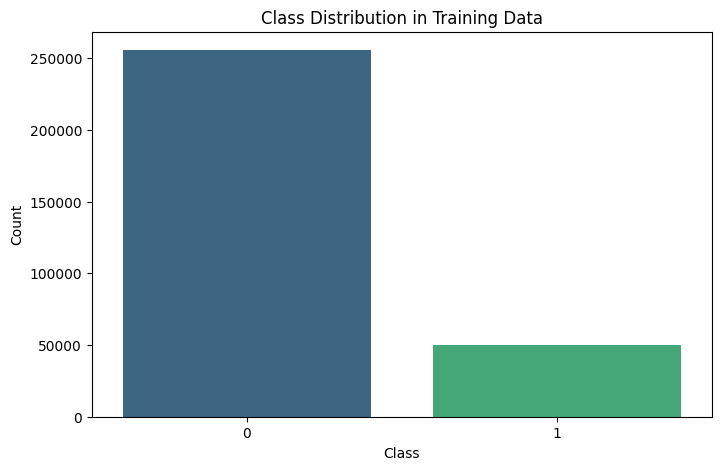

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [10]:
class_counts = y_train.value_counts()
print("Class Distribution:")
print(class_counts)
print("\nClass Percentage:")
print(class_counts / len(y_train) * 100)

Class Distribution:
Response
0    255642
1     50081
Name: count, dtype: int64

Class Percentage:
Response
0    83.618831
1    16.381169
Name: count, dtype: float64


In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

In [12]:
samplers = {
    "Undersampling": RandomUnderSampler(),
    "Oversampling": RandomOverSampler(),
    "SMOTE": SMOTE()
}

In [13]:
results = {}
for method, sampler in samplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    model = DecisionTreeClassifier()
    model.fit(X_resampled, y_resampled)
    results[method] = evaluate_model(model, X_test, y_test)

In [14]:
ensemble_model = RandomForestClassifier()
ensemble_model.fit(X_train, y_train)
results["Ensemble (Random Forest)"] = evaluate_model(ensemble_model, X_test, y_test)

In [15]:
for method, scores in results.items():
    print(f"\n{method}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")


Undersampling:
Accuracy: 0.7671
Precision: 0.8512
Recall: 0.7671
F1 Score: 0.7925

Oversampling:
Accuracy: 0.8162
Precision: 0.8136
Recall: 0.8162
F1 Score: 0.8149

SMOTE:
Accuracy: 0.8113
Precision: 0.8224
Recall: 0.8113
F1 Score: 0.8163

Ensemble (Random Forest):
Accuracy: 0.8385
Precision: 0.8253
Recall: 0.8385
F1 Score: 0.8305
